# IMPORTING LIBRARIES AND GETTING DATASET

In [4]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#reading the data into a DataFrame and limiting it to 20000 rows
df = pd.read_csv("mrkt_bskt.csv").head(20000)
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
19995,1721,15-10-2015,whole milk
19996,2877,10-04-2015,waffles
19997,3848,11-10-2015,frozen vegetables
19998,4344,01-03-2015,long life bakery product


## PREPARING THE DATASET

In [6]:
#displaying the general information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    20000 non-null  int64 
 1   Date             20000 non-null  object
 2   itemDescription  20000 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.9+ KB


In [8]:
#checking for null values within the dataset
df.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [9]:
#converting the date column from object to datetime datatype
df["date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    20000 non-null  int64         
 1   Date             20000 non-null  object        
 2   itemDescription  20000 non-null  object        
 3   date             20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 625.1+ KB


C:\Users\Chinwendu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Chinwendu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Chinwendu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Chinwendu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-12-2015' in DD/MM/YYYY format. Provide 

In [10]:
df['Date'] = df['Date'].astype('object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    20000 non-null  int64         
 1   Date             20000 non-null  object        
 2   itemDescription  20000 non-null  object        
 3   date             20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 625.1+ KB


In [12]:
df.head()

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-05-01
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-01-02


## EXPLORATION, ANALYSIS AND VISUALIZATIONS

In [13]:
#counting the frequency of each value in the itemDescription column and arranging the frequency in descending order
Item_distr = df.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency', ascending=False).head(10)
Item_distr

,itemDescription,Frequency
160,whole milk,1607
101,other vegetables,1186
127,sausage,924
152,tropical fruit,898
119,rolls/buns,843
120,root vegetables,749
30,citrus fruit,736
135,soda,672
161,yogurt,596
56,frankfurter,580


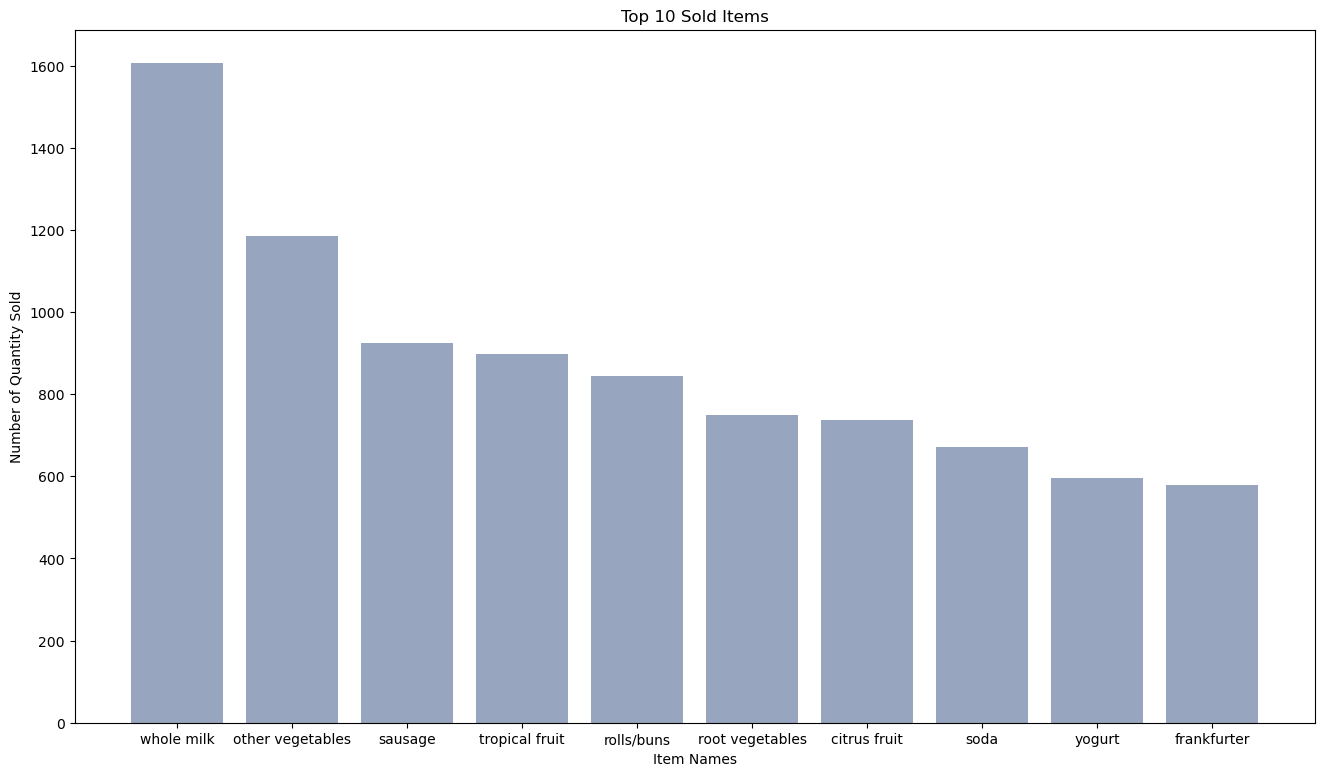

In [42]:
#visualizing the top ten most frequent items based on the table above
Item_distr = df.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency', ascending=False).head(10)

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

plt.figure(figsize=(16, 9))

plt.bar(x_pos, height, color=(0.2, 0.3, 0.5, 0.5))

plt.title("Top 10 Sold Items")
plt.xlabel("Item Names")
plt.ylabel("Number of Quantity Sold")

plt.xticks(x_pos,bars) 
plt.show()

In [15]:
#setting the date as the index in the dataframe
df_date = df.set_index(["date"])
df_date

,Member_number,Date,itemDescription
date,,,
2015-07-21,1808,21-07-2015,tropical fruit
2015-05-01,2552,05-01-2015,whole milk
2015-09-19,2300,19-09-2015,pip fruit
2015-12-12,1187,12-12-2015,other vegetables
2015-01-02,3037,01-02-2015,whole milk
...,...,...,...
2015-10-15,1721,15-10-2015,whole milk
2015-10-04,2877,10-04-2015,waffles
2015-11-10,3848,11-10-2015,frozen vegetables


In [43]:
#displaying the total number of items picked in a month
time_graph=df_date.resample("M")["itemDescription"].count()
time_graph

date
2014-01-31     570
2014-02-28     585
2014-03-31     574
2014-04-30     570
2014-05-31     616
2014-06-30     572
2014-07-31     619
2014-08-31     602
2014-09-30     528
2014-10-31     598
2014-11-30     569
2014-12-31     597
2015-01-31    1175
2015-02-28     953
2015-03-31    1119
2015-04-30    1048
2015-05-31    1081
2015-06-30    1131
2015-07-31    1068
2015-08-31    1226
2015-09-30    1029
2015-10-31    1055
2015-11-30    1145
2015-12-31     970
Freq: M, Name: itemDescription, dtype: int64

[Text(0.5, 0, 'date'), Text(0, 0.5, 'no. of items sold')]

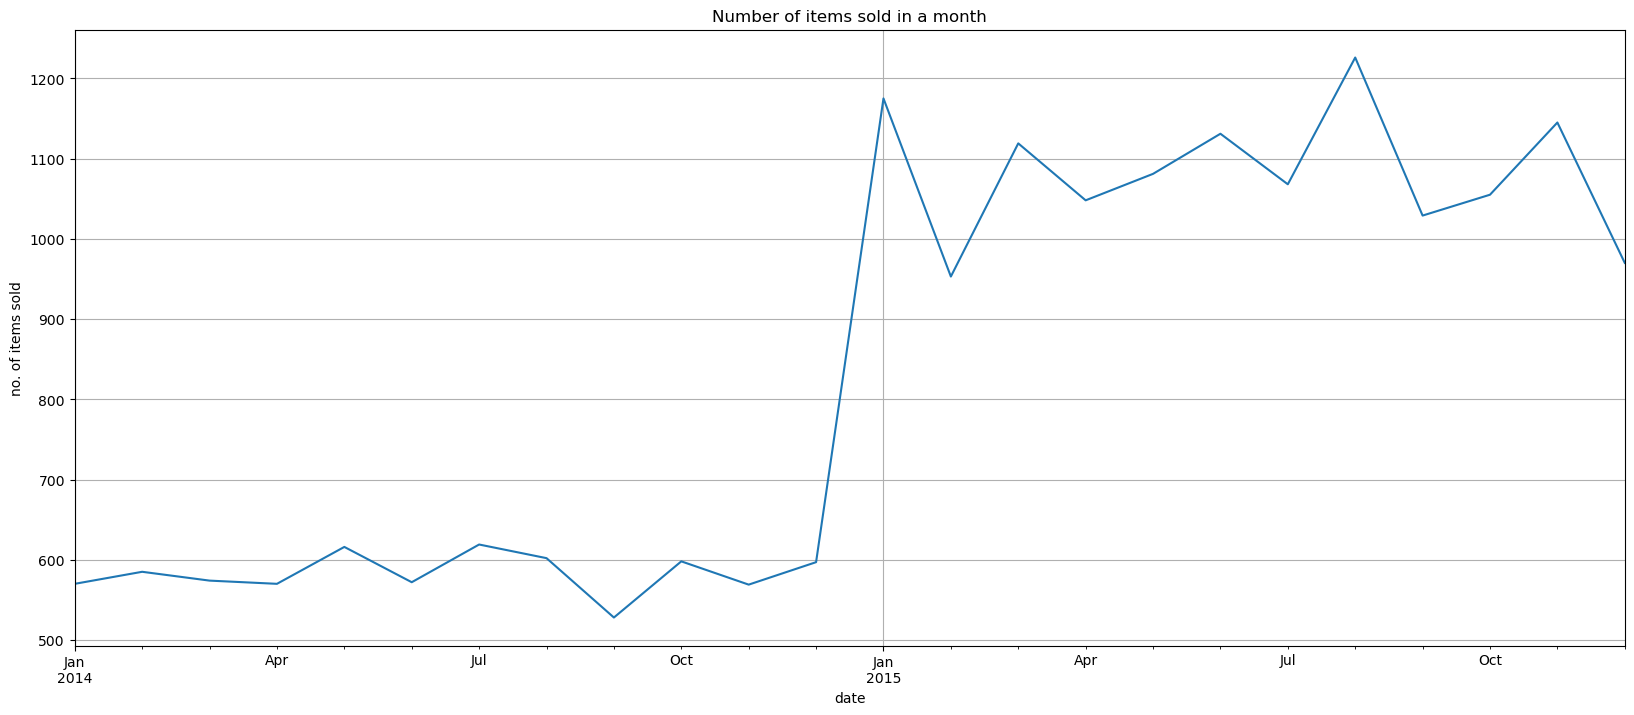

In [44]:
#plotting a time graph against total items
time_graph.plot(figsize = (20,8), grid = True, title = 'Number of items sold in a month').set(xlabel ="date", ylabel="no. of items sold")

## MARKET BASKET ANALYSIS

In [39]:
#calling out the columns required for the analysis and rearranging it in descending order
cust_level = df[["Member_number","itemDescription"]].sort_values(by = "Member_number", ascending = False).head(25)
cust_level["itemDescription"] = cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
9340,5000,bottled beer
3578,5000,soda
19727,5000,root vegetables
11728,5000,fruit/vegetable juice
14840,4999,semi-finished bread
16986,4999,herbs
12171,4999,other vegetables
837,4999,bottled water
18774,4999,whipped/sour cream
7644,4999,berries


## USING THE APRIOPRI ASSOCIATION METHOD

In [18]:
#importing the apriori method from the apyori library
from apyori import apriori

In [19]:
#groupingthe data and converting them to a list
transactions = cust_level.groupby('Member_number')['itemDescription'].apply(list).tolist()
transactions

[['ice cream', 'chocolate'],
 ['newspapers', 'specialty chocolate', 'tropical fruit', 'sausage'],
 ['root vegetables',
  'whole milk',
  'yogurt',
  'other vegetables',
  'processed cheese'],
 ['other vegetables',
  'canned beer',
  'frankfurter',
  'whole milk',
  'napkins',
  'pip fruit'],
 ['brown bread',
  'tropical fruit',
  'chocolate',
  'UHT-milk',
  'onions',
  'citrus fruit'],
 ['sausage', 'fruit/vegetable juice'],
 ['rice'],
 ['tropical fruit',
  'bottled beer',
  'salty snack',
  'misc. beverages',
  'rolls/buns',
  'dessert'],
 ['whole milk', 'tropical fruit', 'white wine'],
 ['rolls/buns', 'curd'],
 ['semi-finished bread',
  'herbs',
  'other vegetables',
  'bottled water',
  'whipped/sour cream',
  'berries',
  'berries',
  'tropical fruit',
  'butter milk'],
 ['bottled beer', 'soda', 'root vegetables', 'fruit/vegetable juice']]

In [20]:
#using the apriori rule
rules = apriori(transactions, min_support = 0.002, min_confidence=0.05, min_lift=3, min_length=2)

In [21]:
#converting the results to a list
results = list(rules)

In [22]:
#showing the results
results

[RelationRecord(items=frozenset({'UHT-milk', 'brown bread'}), support=0.08333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'UHT-milk'}), items_add=frozenset({'brown bread'}), confidence=1.0, lift=12.0), OrderedStatistic(items_base=frozenset({'brown bread'}), items_add=frozenset({'UHT-milk'}), confidence=1.0, lift=12.0)]),
 RelationRecord(items=frozenset({'UHT-milk', 'chocolate'}), support=0.08333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'UHT-milk'}), items_add=frozenset({'chocolate'}), confidence=1.0, lift=6.0), OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'UHT-milk'}), confidence=0.5, lift=6.0)]),
 RelationRecord(items=frozenset({'UHT-milk', 'citrus fruit'}), support=0.08333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'UHT-milk'}), items_add=frozenset({'citrus fruit'}), confidence=1.0, lift=12.0), OrderedStatistic(items_base=frozenset({'citrus fruit'}), items_add=frozens

In [34]:
#creating a function to inspect the results and placing it into a dataframe
def inspect(results):
    lhs=[tuple(result[2][0][0])[0] for result in results]
    rhs=[tuple(result[2][0][1])[0] for result in results]
    supports=[result[1] for result in results]
    confidence=[result[2][0][2] for result in results]
    lifts=[result[2][0][3] for result in results]
    return list(zip(lhs,rhs,supports,confidence,lifts))
results_to_df=pd.DataFrame(inspect(results), columns=["left hand side","right hand side","supports","confidence","lifts"])

In [38]:
#showing the 50 largest results
results_to_df.nlargest(n=50,columns="lifts")

,left hand side,right hand side,supports,confidence,lifts
0,UHT-milk,brown bread,0.083333,1.0,12.0
2,UHT-milk,citrus fruit,0.083333,1.0,12.0
3,UHT-milk,onions,0.083333,1.0,12.0
4,berries,bottled water,0.083333,1.0,12.0
5,berries,butter milk,0.083333,1.0,12.0
6,berries,herbs,0.083333,1.0,12.0
8,berries,semi-finished bread,0.083333,1.0,12.0
9,berries,whipped/sour cream,0.083333,1.0,12.0
17,bottled water,butter milk,0.083333,1.0,12.0
18,bottled water,herbs,0.083333,1.0,12.0
